<a href="https://colab.research.google.com/github/AlinaSabitova/Machine_learning/blob/main/ML_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Метод опорных векторов

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.datasets import make_blobs

# Генерация данных
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

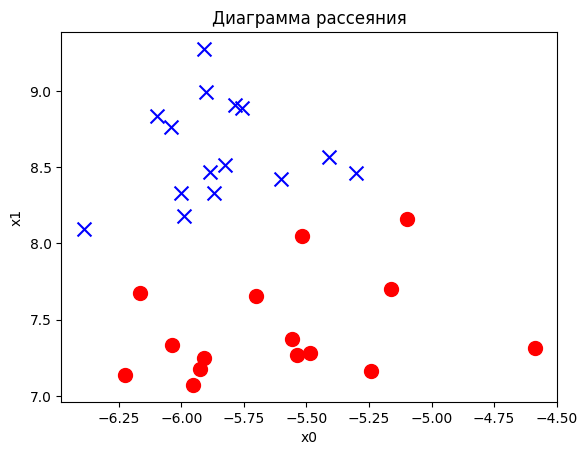

In [10]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [11]:
from sklearn.svm import SVC  # Импортируем класс SVC
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [12]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [13]:
svm_linear.intercept_

array([-64.2533988])

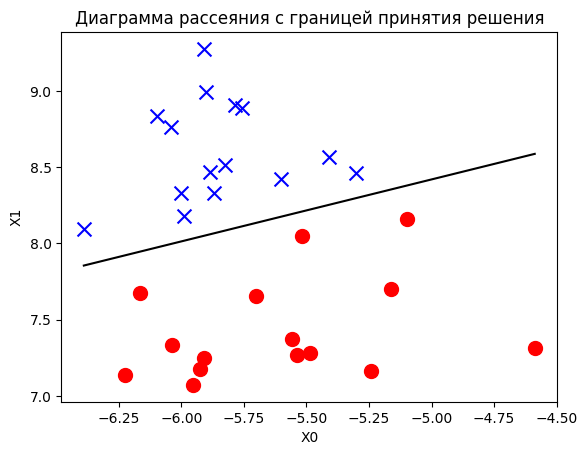

In [17]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [18]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [19]:
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

In [20]:
svm_linear.n_support_

array([1, 2], dtype=int32)

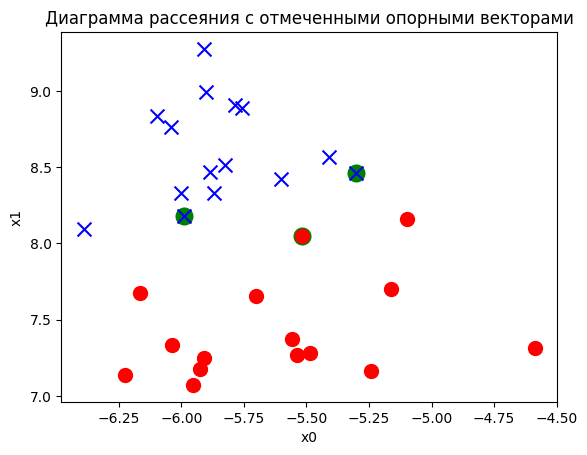

In [21]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

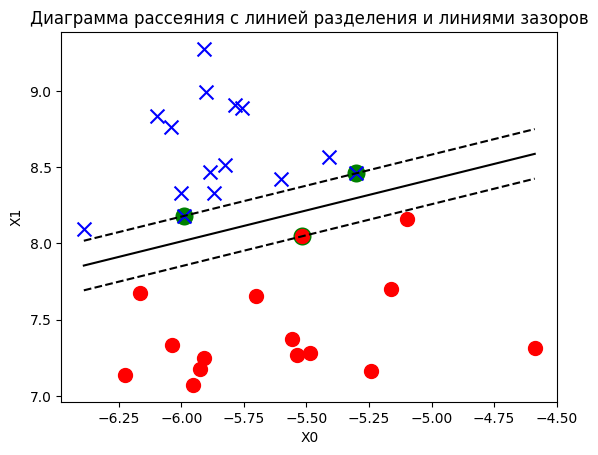

In [22]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

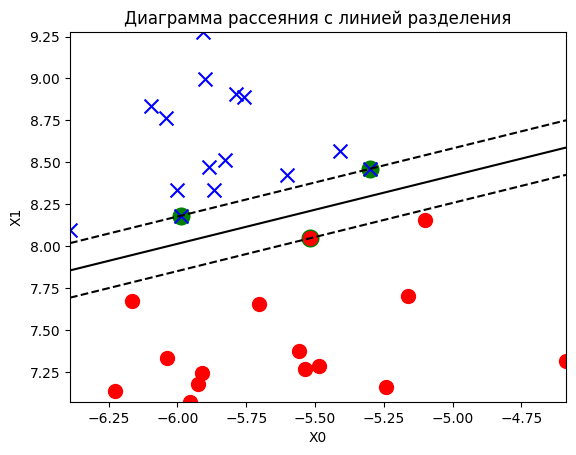

In [23]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [24]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [25]:
y_pred =  svm_linear.predict(X)

In [26]:
from sklearn import metrics  # Импортируем модуль metrics
metrics.accuracy_score(y, y_pred)

1.0

In [27]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [28]:
observation_new = [[-5.25, 7.5]]

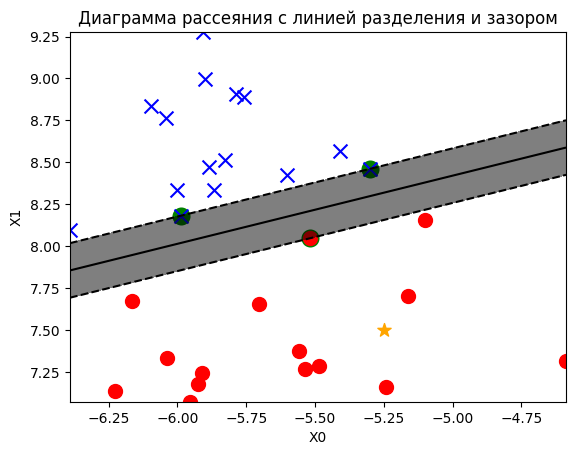

In [29]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [30]:
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [31]:
svm_linear.predict(observation_new)

array([0])

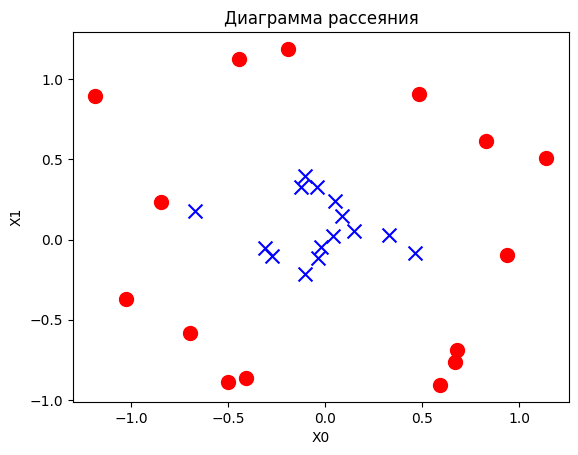

In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [33]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [34]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

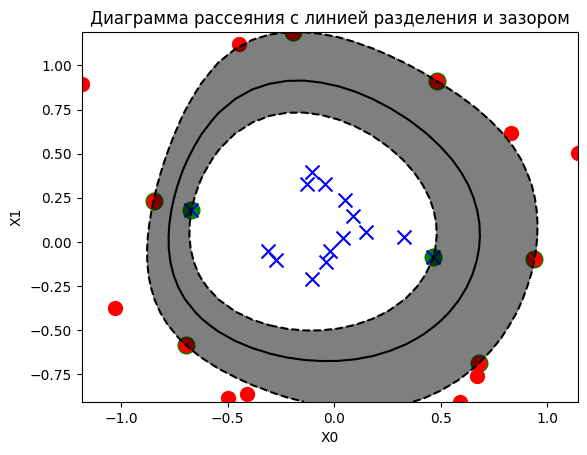

In [35]:
plot_decision_regions(X, y, svm_rbf)

In [36]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[7, 8],
       [8, 7]])

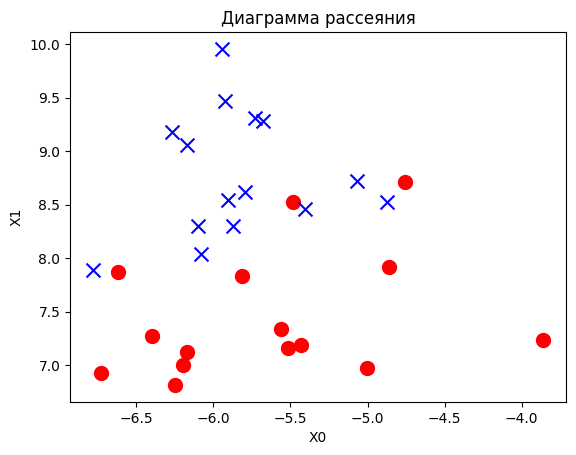

In [37]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [38]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

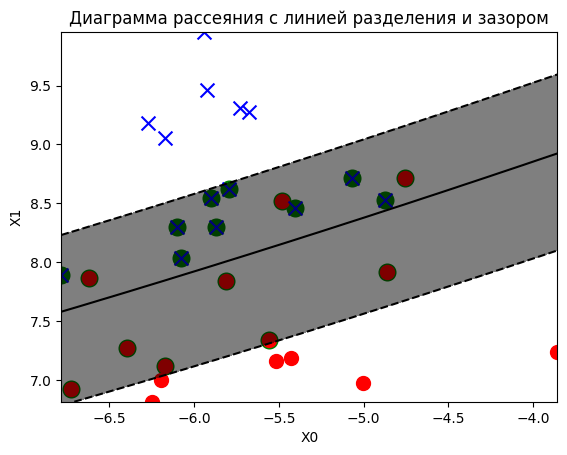

In [39]:
plot_decision_regions(X, y, svm_poly)

In [40]:
svm_poly.n_support_

array([9, 9], dtype=int32)

In [41]:
example_array = np.array([9, 9], dtype=np.int32)

In [42]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

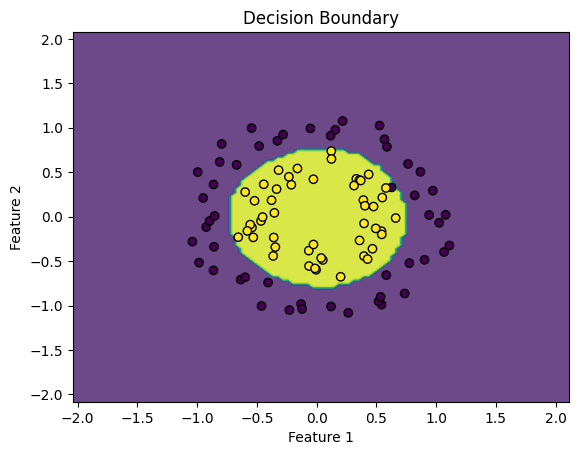

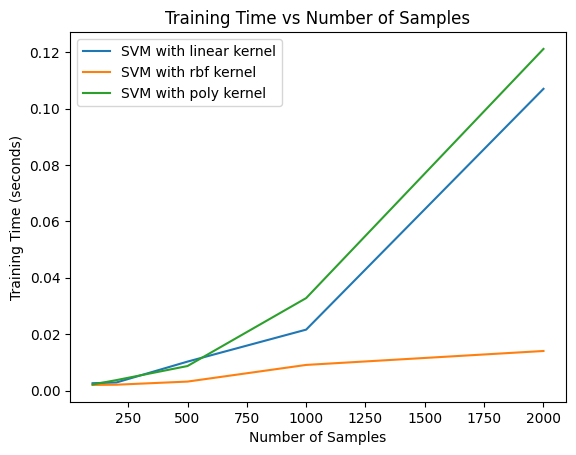

Accuracy of Classifiers:
SVM (RBF): 0.98
Random Forest: 0.98
Logistic Regression: 0.61


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Функция для визуализации границы принятия решения
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Функция для измерения времени обучения SVM
def measure_training_time(n_samples):
    X, y = make_circles(n_samples=n_samples, noise=0.1, factor=0.5)

    kernels = ['linear', 'rbf', 'poly']
    times = {}

    for kernel in kernels:
        svm = SVC(kernel=kernel)
        start_time = time.time()
        svm.fit(X, y)
        end_time = time.time()
        times[kernel] = end_time - start_time

    return times

# Сравнение производительности различных классификаторов
def compare_classifiers(X_train, X_test, y_train, y_test):
    classifiers = {
        'SVM (RBF)': SVC(kernel='rbf'),
        'Random Forest': RandomForestClassifier(),
        'Logistic Regression': LogisticRegression()
    }

    accuracies = {}

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracies[name] = accuracy_score(y_test, y_pred)

    return accuracies

# Основной код
if __name__ == "__main__":
    # Визуализация границы принятия решения
    X, y = make_circles(n_samples=100, noise=0.1, factor=0.5)
    svm = SVC(kernel='rbf')
    svm.fit(X, y)
    plot_decision_boundary(svm, X, y)

    # Измерение времени обучения
    sample_sizes = [100, 200, 500, 1000, 2000]
    training_times = {}

    for n in sample_sizes:
        training_times[n] = measure_training_time(n)

    # Визуализация времени обучения
    for kernel in training_times[100].keys():
        times = [training_times[n][kernel] for n in sample_sizes]
        plt.plot(sample_sizes, times, label=f'SVM with {kernel} kernel')

    plt.xlabel('Number of Samples')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time vs Number of Samples')
    plt.legend()
    plt.show()

    # Сравнение производительности классификаторов
    X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracies = compare_classifiers(X_train, X_test, y_train, y_test)

    # Вывод результатов
    print("Accuracy of Classifiers:")
    for name, accuracy in accuracies.items():
        print(f"{name}: {accuracy:.2f}")


# Задания для самостоятельного выполнения

1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

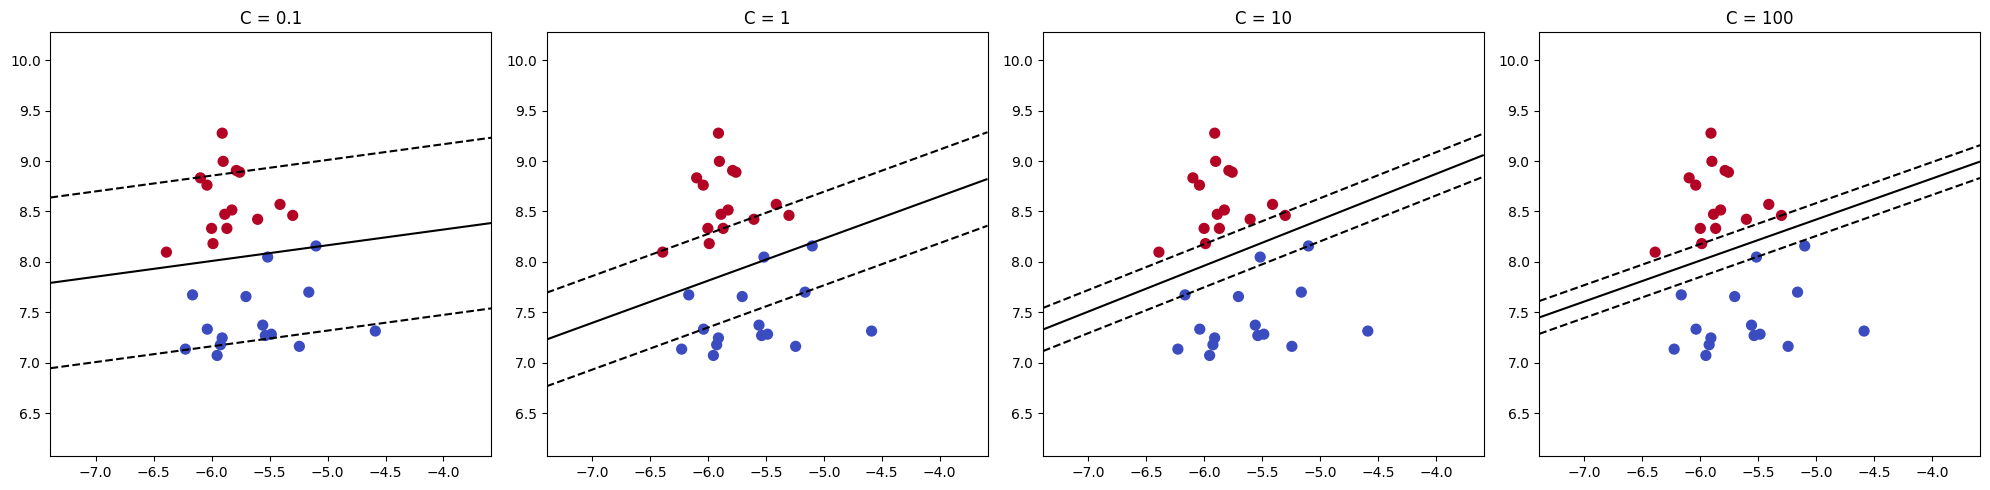

In [45]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

C_values = [0.1, 1, 10, 100]
fig, axes = plt.subplots(1, len(C_values), figsize=(20, 5))

for i, C in enumerate(C_values):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    axes[i].contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    axes[i].set_title(f"C = {C}")

plt.tight_layout()
plt.show()

2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

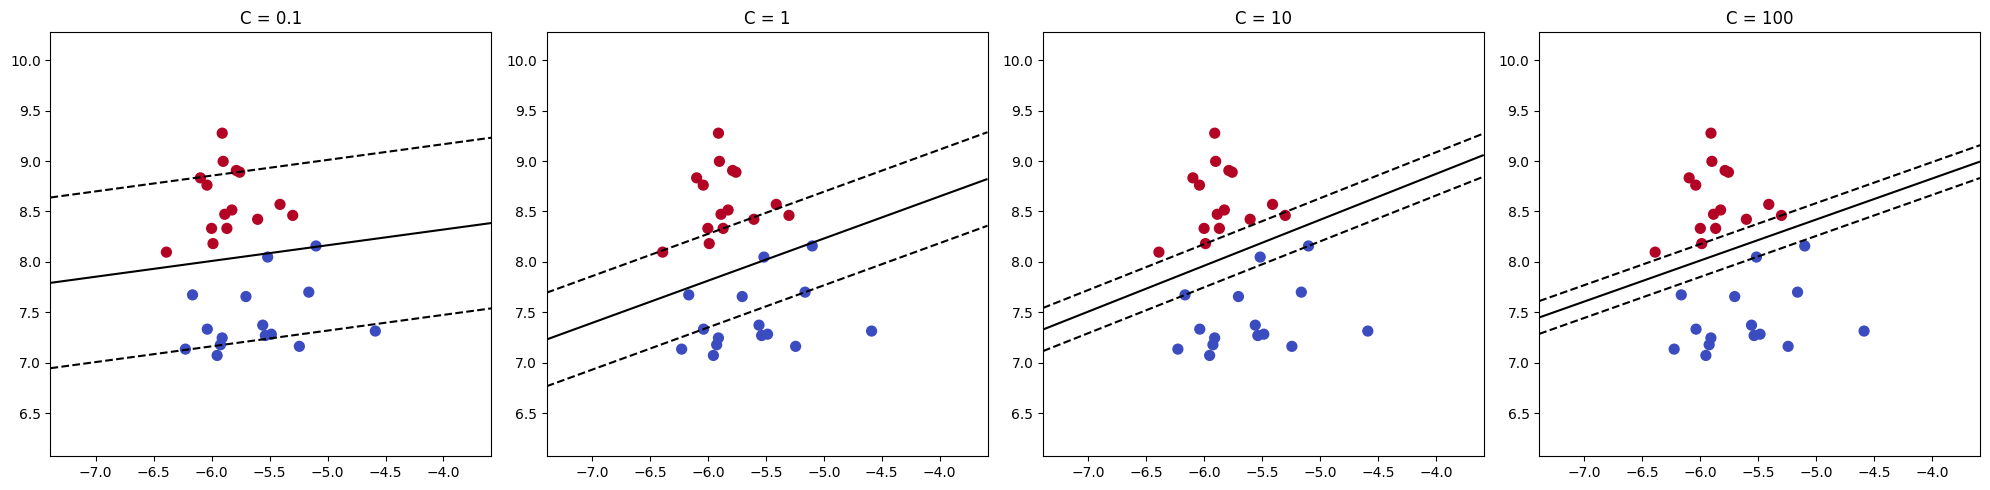

In [46]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

C_values = [0.1, 1, 10, 100]
fig, axes = plt.subplots(1, len(C_values), figsize=(20, 5))

for i, C in enumerate(C_values):
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    axes[i].contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    axes[i].set_title(f"C = {C}")

plt.tight_layout()
plt.show()

3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

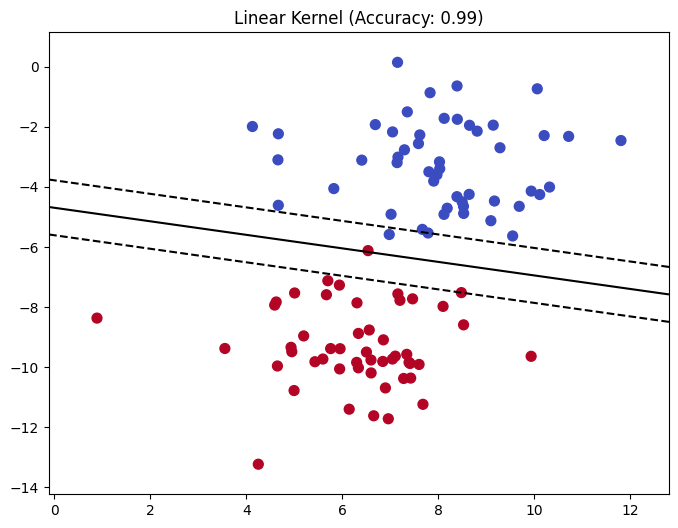

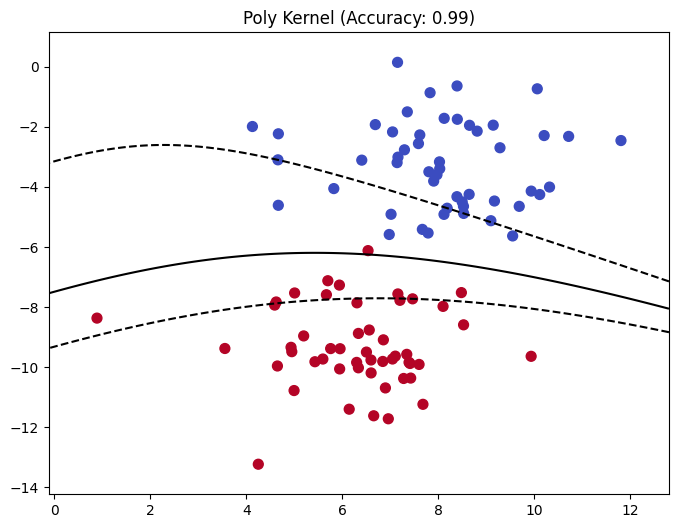

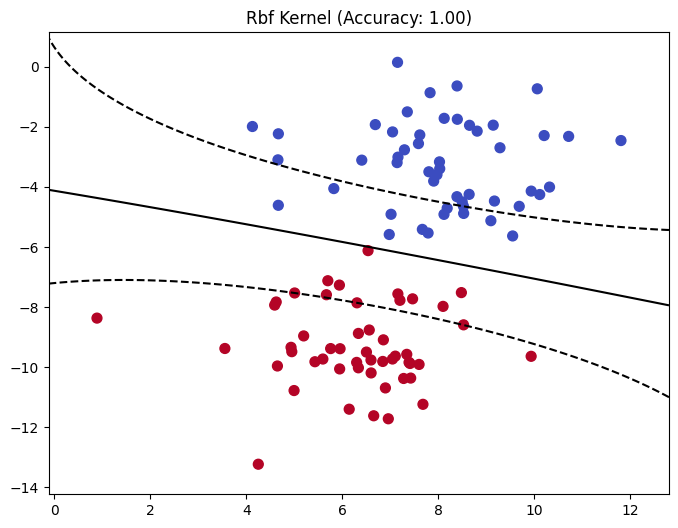

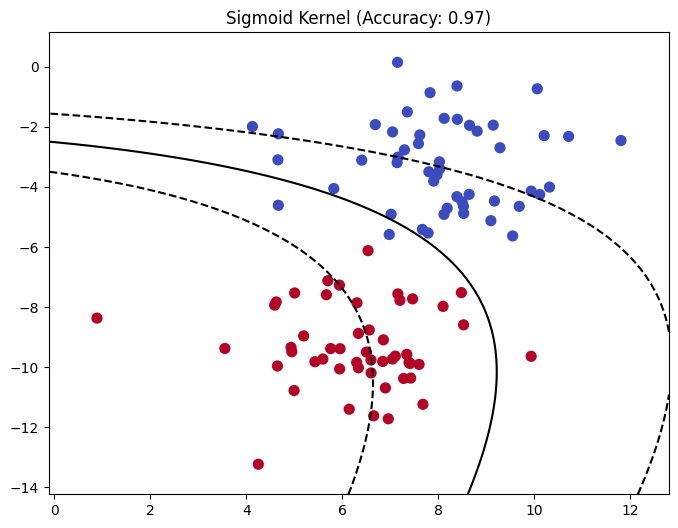

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_features=2, n_samples=100, centers=2, random_state=6, cluster_std=1.5)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

def plot_decision_boundary(svm, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    plt.title(title)
    plt.show()

for kernel in kernels:
    svm = SVC(kernel=kernel, C=1, degree=3)
    svm.fit(X, y)
    y_pred = svm.predict(X)
    accuracy = accuracy_score(y, y_pred)
    plot_decision_boundary(svm, X, y, f"{kernel.capitalize()} Kernel (Accuracy: {accuracy:.2f})")

4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайтевывод о том, как он влияет на модель.

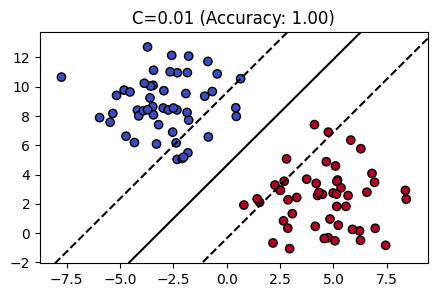

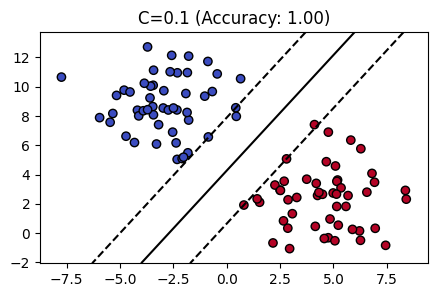

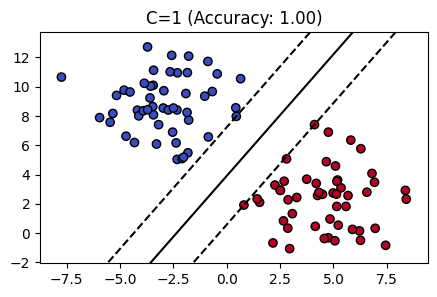

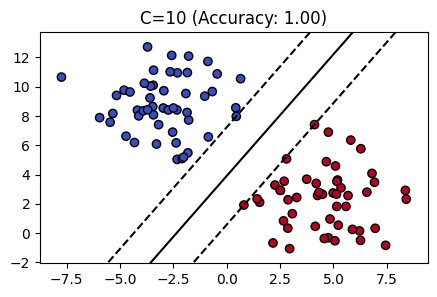

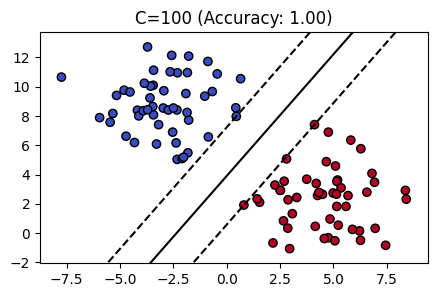

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_features=2, n_samples=100, centers=2, random_state=42, cluster_std=2)

def plot_svc_decision(svm, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 3))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    plt.title(title)
    plt.show()

C_values = [0.01, 0.1, 1, 10, 100]
for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)
    y_pred = svm.predict(X)
    accuracy = accuracy_score(y, y_pred)
    plot_svc_decision(svm, X, y, f"C={C} (Accuracy: {accuracy:.2f})")

5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

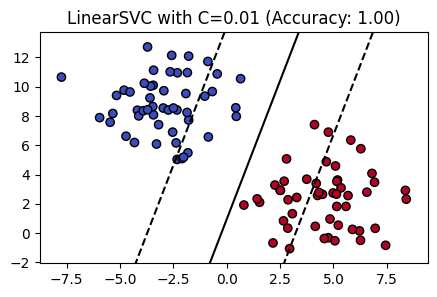

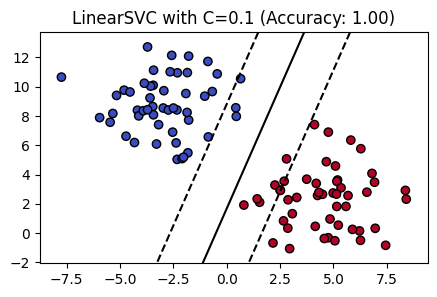

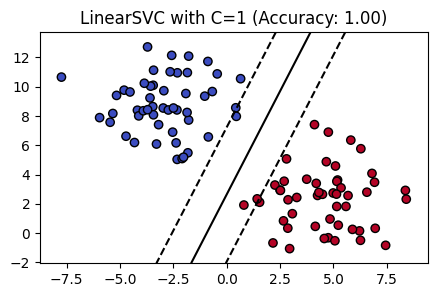

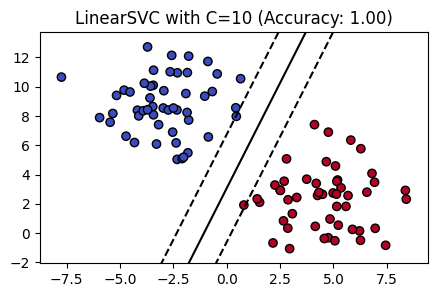

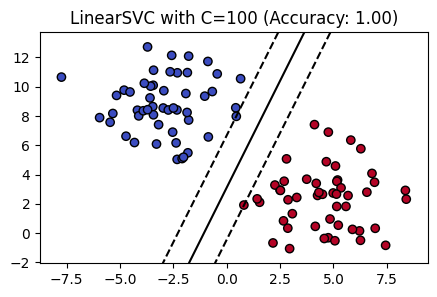

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

X, y = make_blobs(n_features=2, n_samples=100, centers=2, random_state=42, cluster_std=2)

def plot_linear_svc(svm, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
    )
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5, 3))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    plt.title(title)
    plt.show()

C_values = [0.01, 0.1, 1, 10, 100]
for C in C_values:
    linear_svc = LinearSVC(C=C, max_iter=10000, dual=True)
    linear_svc.fit(X, y)
    y_pred = linear_svc.predict(X)
    accuracy = accuracy_score(y, y_pred)
    plot_linear_svc(linear_svc, X, y, f"LinearSVC with C={C} (Accuracy: {accuracy:.2f})")

6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [50]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
import numpy as np

X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Типы ядер
    'C': [0.01, 0.1, 1, 10, 100],  # Значения для регуляризации
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'C': 100, 'kernel': 'rbf'}, 0.884)

7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

In [51]:
X_large, y_large = make_classification(n_samples=5000, n_features=5, n_classes=2, random_state=42)

grid_search_large = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_large.fit(X_large, y_large)

best_params_large = grid_search_large.best_params_
best_score_large = grid_search_large.best_score_

best_params_large, best_score_large

Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'C': 100, 'kernel': 'rbf'}, 0.9042000000000001)

8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

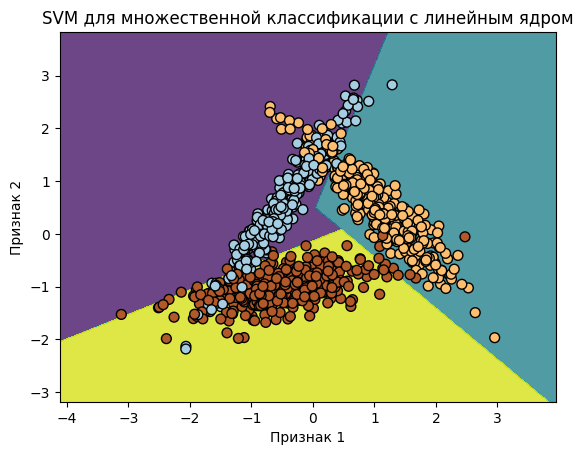

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=1000, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm = SVC(kernel='linear', decision_function_shape='ovr', C=1)
svm.fit(X_scaled, y)

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.Paired)
plt.title("SVM для множественной классификации с линейным ядром")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

# Контрольные вопросы

## 1. Чем отличается класс SVC и LinearSVC в библиотеке sklearn при использовании метода опорных векторов без ядра?
SVC использует более общий алгоритм для SVM, подходит для любых ядер, включая линейное. При использовании линейного ядра работает так же, как и LinearSVC, но может быть медленнее.

LinearSVC оптимизирован для работы только с линейным ядром и использует более эффективный метод оптимизации (метод стохастического градиентного спуска), что делает его быстрее на больших датасетах.
## 2. Чем отличается метод опорных векторов с разными ядрами? Как выбор функции ядра влияет на форму границы принятия решения?
Линейное ядро:
Граница решения: Прямая или гиперплоскость. Используется, когда данные линейно разделимы или почти линейно разделимы.

Полиномиальное ядро:
Граница решения: Кривая, которая может быть сложной, в зависимости от степени полинома. Полезно для данных, которые не могут быть разделены прямой, но могут быть разделены с помощью кривой.

Гауссово (RBF) ядро:
Граница решения: Сложная, часто «волнообразная» и гибкая, может адаптироваться к данным с произвольной формой. Очень мощное ядро, которое может работать с сильно перекрывающимися классами, создает зазор вокруг каждого класса.
## 3. Как метод опорных векторов работает в задачах множественной классификации?
Метод опорных векторов (SVM) для задач множественной классификации обычно реализуется с помощью подходов "один против всех" (OvA) или "один против одного" (OvO).

Один против всех (OvA):
Для каждого класса строится отдельный классификатор, который отличает данный класс от всех остальных. В результате получается столько классификаторов, сколько классов в задаче. Для классификации нового примера каждый классификатор выдает вероятность принадлежности к своему классу, а итоговое решение принимает классификатор с наибольшей вероятностью.

Один против одного (OvO):
Для каждой пары классов строится отдельный классификатор, то есть общее количество классификаторов равно числу пар классов. В процессе классификации каждый классификатор решает, какой из двух классов относится к примеру, и итоговое решение принимается большинством голосов. В библиотеке scikit-learn класс SVC автоматически использует подход OvA для многоклассовых задач, если количество классов больше двух.

Метод опорных векторов с различными ядрами (например, линейное или RBF) может быть применен для многоклассовой классификации, где границы решений между классами будут учитывать все возможные разделения.
## 4. Как метод опорных векторов может быть использован для решения задачи регрессии?
Метод опорных векторов (SVM) может быть использован для решения задачи регрессии. В этом случае метод известен как «опорно-векторная регрессия».

Принцип работы заключается в поиске гиперплоскости, при которой риск в многомерном пространстве будет минимальным. По сравнению с традиционной регрессионной моделью SVM оценивает коэффициенты путём минимизации квадратичных потерь. Так, если прогнозное значение попадает в область гиперплоскости, то потери равны нулю, в противном случае — разности прогнозного и фактического значений.

Если данные расположены так, что нельзя провести прямую линию, которая бы чётко разделила их на две группы. Например, если точки расположены в виде окружности, то прямая линия не сможет их разделить на внутренние и внешние. В этом случае SVM может использовать нелинейные функции для преобразования данных в более высокоразмерное пространство.